# Breakout - Thresholds and Receiver-Operator Curve

### Part 1: Thresholds

Let's consider a hypothetical scenario with actual data to demonstrate how changing the threshold affects performance metrics.

Suppose we have a dataset of email classifications, where the task is to classify emails as either spam (positive class) or not spam (negative class). We have a model that outputs probabilities for each email, and we want to adjust the threshold to see how it affects the model's precision and recall.

Let's start by loading some sample data and calculating precision and recall at a default threshold of 0.5. Then, we'll adjust the threshold and observe the changes in precision and recall.

In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

In [2]:
# Sample data
true_labels = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])  # Actual labels
predicted_probabilities = np.array([0.7, 0.3, 0.6, 0.4, 0.8, 0.2, 0.9, 0.1, 0.5, 0.4])  # Predicted probabilities

In [3]:
# Default threshold = 0.5
predicted_labels_default = (predicted_probabilities >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision and recall at default threshold
precision_default = precision_score(true_labels, predicted_labels_default)
recall_default = recall_score(true_labels, predicted_labels_default)

print("Precision at default threshold (0.5):", precision_default)
print("Recall at default threshold (0.5):", recall_default)

Precision at default threshold (0.5): 0.4
Recall at default threshold (0.5): 0.4


Adjust the threshold to .3 and note the difference

In [ ]:
# YOUR CODE HERE

In this example, we have a sample of 10 emails with their actual labels and predicted probabilities. We calculate precision and recall at the default threshold of 0.5 and then adjust the threshold to 0.3 to observe the changes in precision and recall.

Adjusting the threshold allows us to trade off between precision and recall based on the specific requirements of the task. Lowering the threshold can increase recall but may decrease precision, and vice versa.

### Part 2: Receiver-Operator Curve

In this example:

* We generate synthetic data using make_classification from scikit-learn.
* We split the data into training and testing sets.
* We train a logistic regression model on the training data.
* We predict probabilities of the positive class on the test set using the trained model.
* We compute the ROC curve and AUC (Area Under the Curve) using the roc_curve and auc functions from scikit-learn.
* Finally, we plot the ROC curve using Matplotlib.

This code generates a plot showing the ROC curve of the logistic regression model along with a dashed diagonal line representing random guessing. The AUC value is also displayed in the legend of the plot.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [5]:
# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Predict probabilities on the test set
probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [9]:
# Compute ROC curve and ROC area for the positive class
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

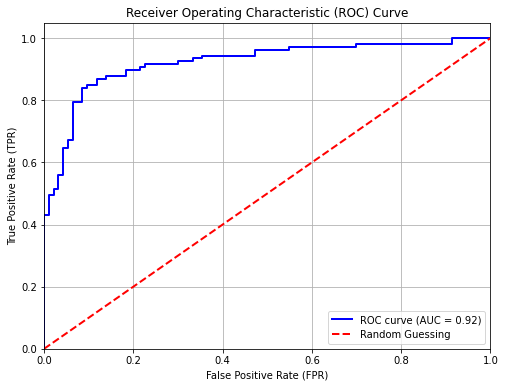

In [10]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In this example:

* We generate random probabilities for the positive class using np.random.rand.
* We also generate random true labels (0 or 1) using np.random.randint.

Your task: 
* Compute the ROC curve and AUC (Area Under the Curve) using the roc_curve and auc functions from scikit-learn.
* Plot the ROC curve using Matplotlib
* Compare an contrast the two model ROC curves

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate random probabilities for the positive class
np.random.seed(42)
probs = np.random.rand(100)  # Random probabilities between 0 and 1
true_labels = np.random.randint(2, size=100)  # Random true labels (0 or 1)

# YOUR CODE HERE

# Compute ROC curve and ROC area for the positive class



# Plot ROC curve


This code generates a plot showing the ROC curve of random predictions along with a dashed diagonal line representing random guessing. The AUC value is also displayed in the legend of the plot. Since the predictions are random, the ROC curve will generally be close to the diagonal line, indicating that the model's performance is no better than random guessing.

Compare and contrast this ROC curve the the one produced earlier.